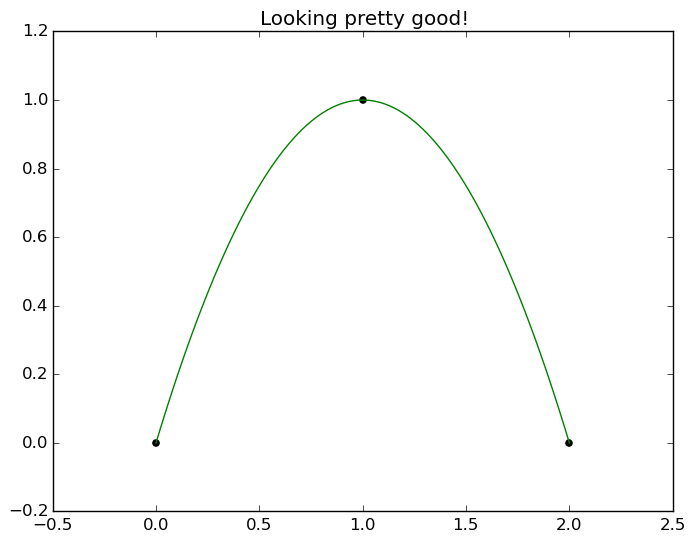

In [2]:
###### Let's begin with a simple example, with no jerk optimization: ######
# Easiest case: pointwise constraints:
xpts = [0,1,2];
ypts = [0,1,0];

# Let's fit a quadratic:
N=3;
x_coeff = zeros(3);
y_coeff = zeros(3);

# Assume the time vector:
T = [0,1,2];

# Form the constraints:
A = [1 T[1] T[1]^2;
     1 T[2] T[2]^2;
     1 T[3] T[3]^2];

# Now we solve the equation A*coeff = constr 
x_coeff = A\xpts;
y_coeff = A\ypts;


# Let's plot the result:
tvals= linspace(0,2,100);
xpoly = zeros(size(tvals,1))
ypoly = zeros(size(tvals,1))

t_ind = 0;
for t in tvals
    t_ind+=1;
    t_vec = [1;t;t^2];
    xpoly[t_ind] = (x_coeff'*t_vec)[1];   # A note here: x_coeff'*t_vec returns a 1 element array
    ypoly[t_ind] = (y_coeff'*t_vec)[1];   # we access the first element so that the type is Float64
end

using PyPlot;
figure(1); clf();
scatter(xpts,ypts,color=:black)
plot(xpoly,ypoly,color=:green)
title("Looking pretty good!");


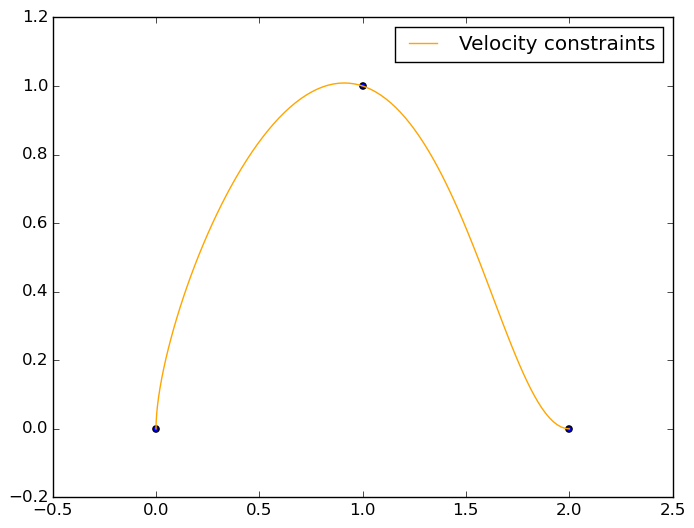

In [5]:

### Now let's add derivative constraints:
vx = [0,1]; # Correspond to initial and final times
vy = [1,0];

# We need to be less lazy about computing A now. This is a function which returns a row vector corresponding to a constraint of given order at the given time.
function constr_order( order, time, degree)
    if(order==0) 
        row_vec = ones(1,degree); 
        for n=2:degree
            row_vec[1,n] = time^(n-1);
        end
        return row_vec;
    end
    row_vec = zeros(1,degree);
    for n = order:degree-1
        coeff = 1; 
        for k=1:order
            coeff = coeff*(n+1-k)
        end

        row_vec[1,n+1] = coeff * (time^(n-order))
    end
    return row_vec;
end

# We need a new polynomial with 3+2 degree:
N = 5;
T = [0,1,2];
xpts = [0,1,2];
ypts = [0,1,0];

# Form the constraints matrix:
A = [constr_order(0,T[1],N);
     constr_order(0,T[2],N);
     constr_order(0,T[3],N);
     constr_order(1,T[1],N);
     constr_order(1,T[3],N)];

# Form the vector of constraint values:
x_B = [xpts; vx];
y_B = [ypts; vy];

# Solve the system:
x_coeff = A\x_B;
y_coeff = A\y_B;

# Plot the result:
t_ind = 0;
for t in tvals
    t_ind+=1;
    t_vec = [1;t;t^2;t^3;t^4];
    xpoly[t_ind] = (x_coeff'*t_vec)[1];   # A note here: x_coeff'*t_vec returns a 1 element array
    ypoly[t_ind] = (y_coeff'*t_vec)[1];   # we access the first element so that the type is Float64
end
scatter(xpts,ypts)
plot(xpoly,ypoly,color=:orange);
legend(["Velocity constraints"]);


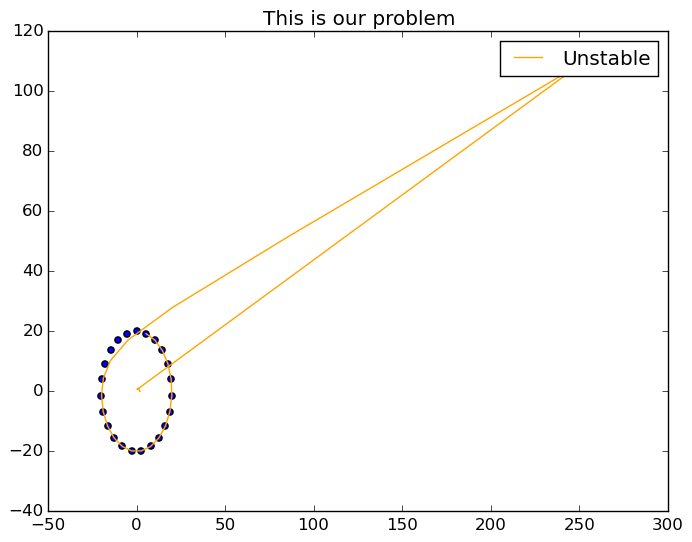

In [6]:
## Just for kicks, let's consider an example that goes very badly. 
num_pts = 23;
xpts = 20*sin(2*pi/num_pts*(1:num_pts));
ypts = 20*cos(2*pi/num_pts*(1:num_pts));
times = collect(0:num_pts-1)

# Now we try to form the A matrix:
A = zeros(0,num_pts);
for n = 1:num_pts
    A = [A; constr_order(0,times[n], num_pts)];
end
x_coeff = A\xpts;
y_coeff = A\ypts;
# Plot the result:
t_ind = 0;
for t in times
    t_ind+=1;
    t_vec = ones(num_pts);
    for k=2:num_pts
       t_vec[k] = t_vec[k-1]*t;
    end
    xpoly[t_ind] = (x_coeff'*t_vec)[1];   # A note here: x_coeff'*t_vec returns a 1 element array
    ypoly[t_ind] = (y_coeff'*t_vec)[1];   # we access the first element so that the type is Float64
end
figure(2);clf();
scatter(xpts, ypts);
plot(xpoly,ypoly,color=:orange);
legend(["Unstable"])
title("This is our problem");
